In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = sns.load_dataset('titanic')
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
90,0,3,male,29.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
487,0,1,male,58.0,0,0,29.70,C,First,man,True,B,Cherbourg,no,True
848,0,2,male,28.0,0,1,33.00,S,Second,man,True,NaN,Southampton,no,False
669,1,1,female,NaN,1,0,52.00,S,First,woman,False,C,Southampton,yes,False
35,0,1,male,42.0,1,0,52.00,S,First,man,True,NaN,Southampton,no,False


In [55]:
df.shape

(891, 15)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [57]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [58]:
df.duplicated().sum()

107

In [59]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
df.corr(numeric_only=True)['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

# Categorical

- pclass
- sex
- sibsp
- parch
- embarked
- adult_male
- survived
- alone

<Axes: xlabel='pclass', ylabel='count'>

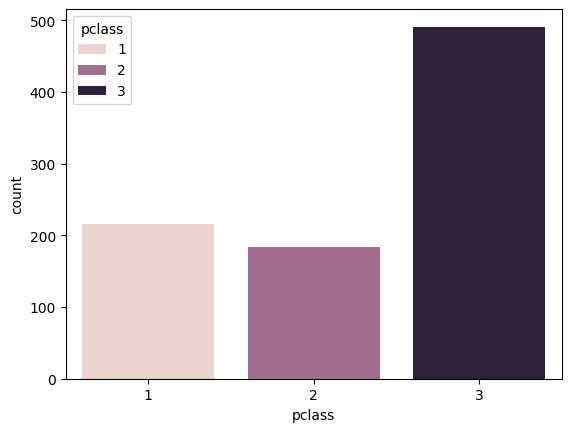

In [131]:
sns.countplot(data=df, x='pclass', hue='pclass')

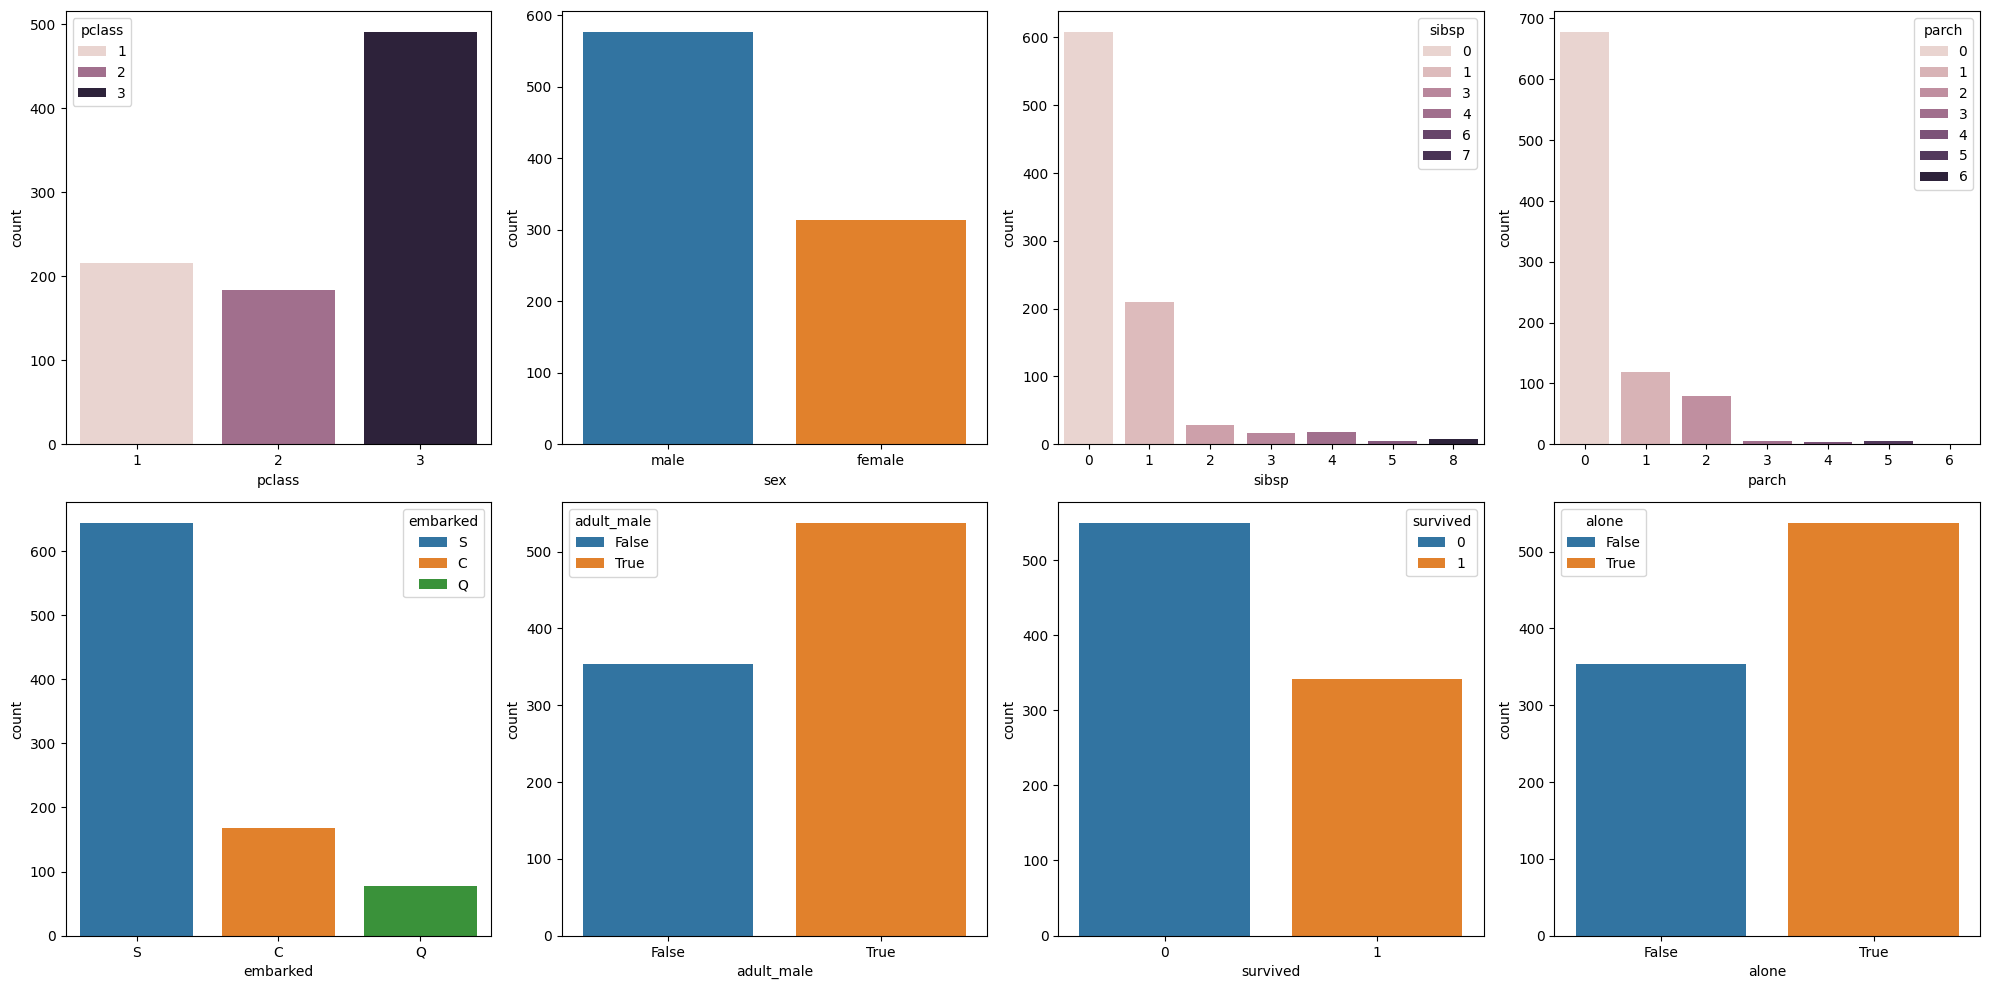

In [105]:
# pclass

# plt.bar(df['pclass'].value_counts().index, df['pclass'].value_counts())
# plt.xticks(df['pclass'].value_counts().index)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

cols = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'adult_male', 'survived', 'alone']

for i in range(2):
    for j in range(4):
        col_index = i * 4 + j
        sns.countplot(data=df, x=cols[col_index], ax=ax[i, j], hue=cols[col_index])    # figure level functions dont work with subplots   

plt.tight_layout()
plt.show()

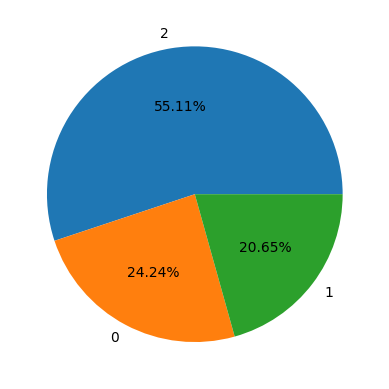

In [124]:
plt.pie(temp['pclass'].value_counts(), labels=temp['pclass'].value_counts().index, autopct='%0.2f%%')
plt.show()

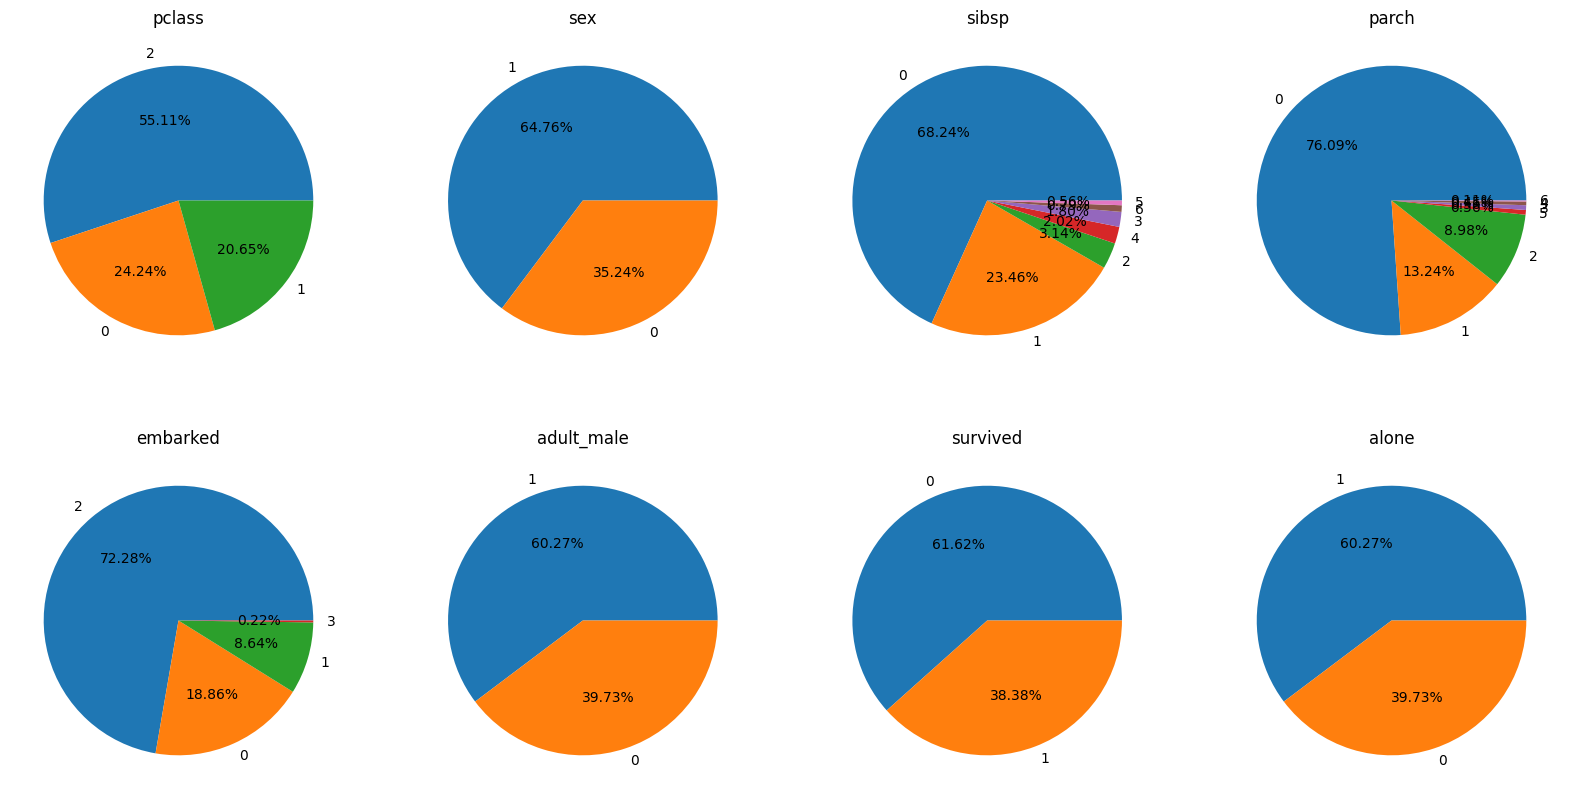

In [129]:
# encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
temp = pd.DataFrame()
for i in df.columns:
    temp[i] = encoder.fit_transform(df[i])

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

cols = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'adult_male', 'survived', 'alone']

for i in range(2):
    for j in range(4):
        col_index = i * 4 + j
        ax[i,j].pie(temp[cols[col_index]].value_counts(), labels=temp[cols[col_index]].value_counts().index, autopct='%0.2f%%') 
        ax[i,j].set_title(cols[col_index])

# Numerical

- age
- fare

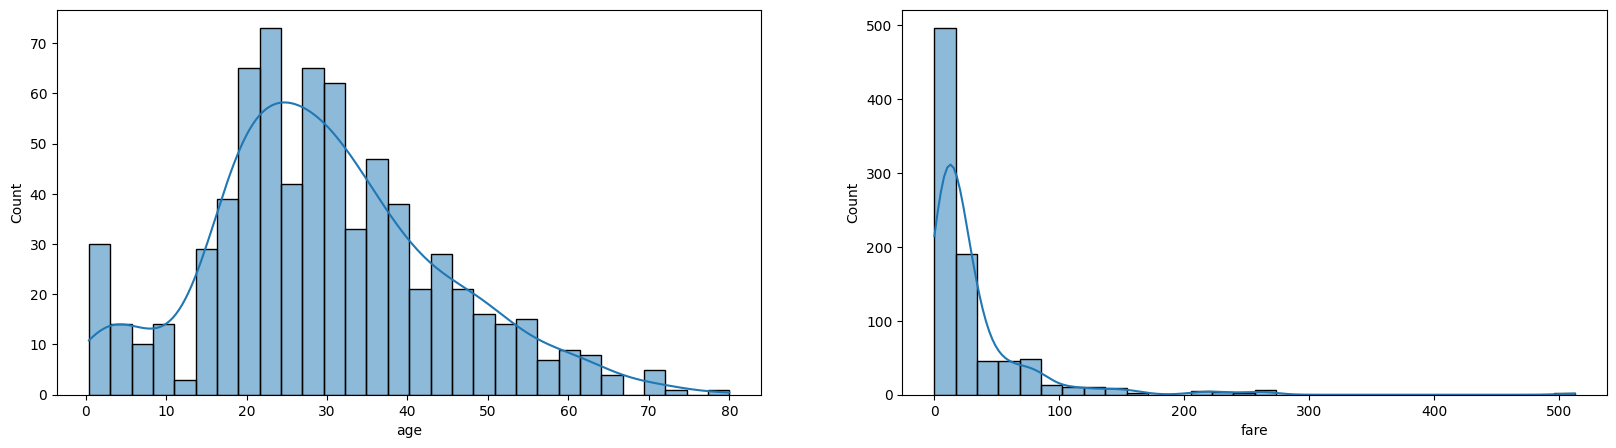

In [162]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

cols = ['age', 'fare']

for i in range(2):
    sns.histplot(data=df, x=cols[i], ax=ax[i], bins=30, kde=True)

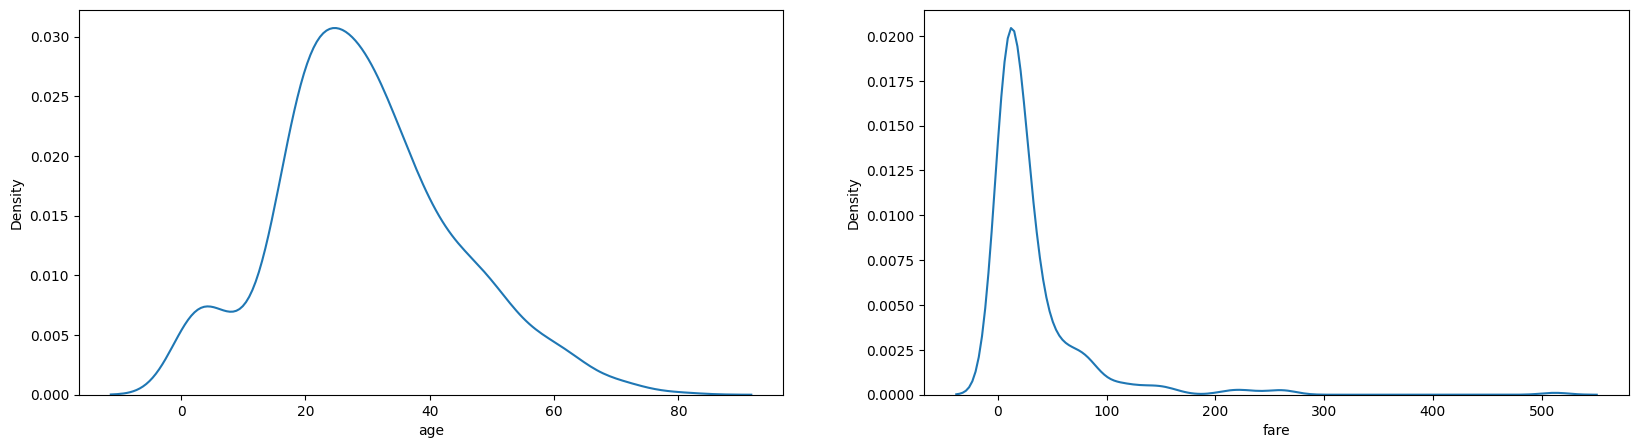

In [161]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

cols = ['age', 'fare']

for i in range(2):
    sns.kdeplot(data=df, x=cols[i], ax=ax[i])

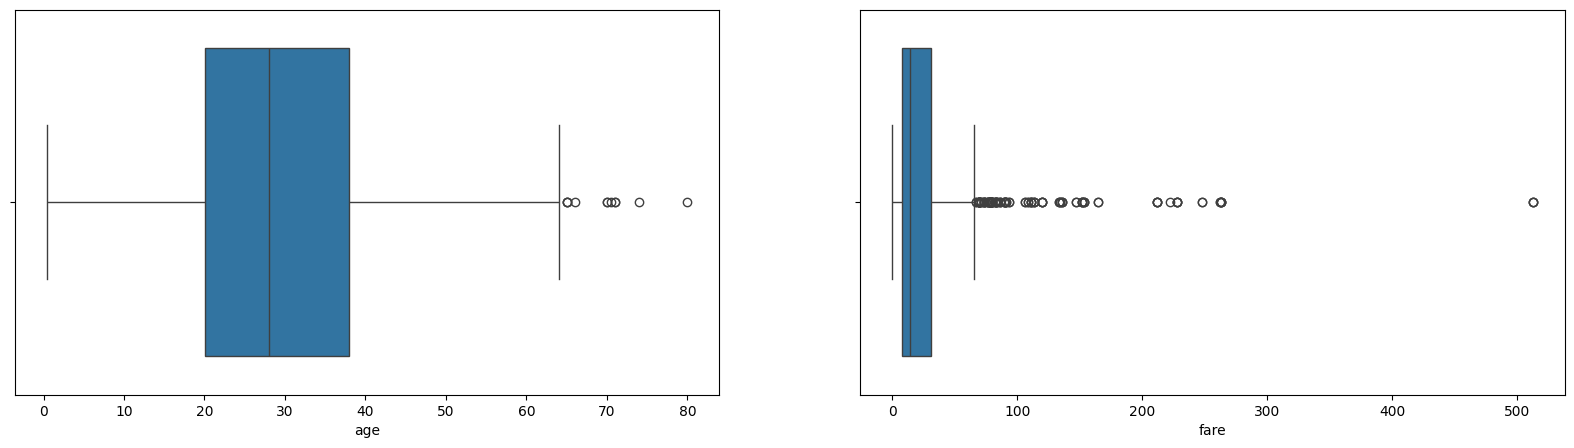

In [159]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

cols = ['age', 'fare']

for i in range(2):
    sns.boxplot(data=df, x=cols[i], ax=ax[i])

In [156]:
print('Skewness :\n')
for col in cols:
    print(f'{col} : {df[col].skew()}')

Skewness :

age : 0.38910778230082704
fare : 4.787316519674893
